In [80]:
import numpy as np
from matplotlib import pyplot as plt

In [125]:
nchan=2
# nspecs=10**np.arange(2,8).astype(int)
# nspecs=np.arange(1,5)
nspecs=np.arange(1,4)*1000000
err=np.zeros(len(nspecs)) #sqrt of variance of power = error on variance estimate
errd=err.copy()
amp=2
niter=100
meanvals=np.zeros(niter,dtype='complex128')
meanvalsd=np.zeros(niter,dtype='complex128')
for j,nspec in enumerate(nspecs):
    print("doing nspec", nspec)
    for i in range(niter):
        Er = amp*np.random.randn(nspec*nchan).reshape(nspec,nchan)
        Ei = amp*np.random.randn(nspec*nchan).reshape(nspec,nchan)
        # Nr = np.random.randn(nspec*nchan).reshape(nspec,nchan)
        # Ni = np.random.randn(nspec*nchan).reshape(nspec,nchan)
        # N1 = np.array(Nr+1j*Ni,dtype='complex64')
        E1 = np.array(Er+1j*Ei,dtype='complex64') #+ N1
        E1d=E1.astype("complex128")
        xcorr=E1*np.conj(E1)
        xcorrd=E1d*np.conj(E1d)
        meanvals[i]=np.mean(xcorr,axis=0)[0]
        meanvalsd[i]=np.mean(xcorrd,axis=0)[0]
    err[j]=np.sqrt(np.mean((meanvals.real-2*amp**2)**2))
    errd[j]=np.sqrt(np.mean((meanvalsd.real-2*amp**2)**2))


doing nspec 1000000
doing nspec 2000000
doing nspec 3000000


Text(0, 0.5, 'error')

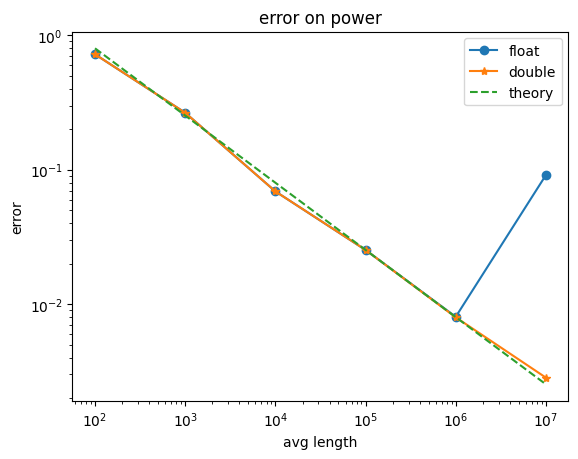

In [124]:
plt.loglog(nspecs,err, marker='o',label="float")
plt.loglog(nspecs,errd,marker='*',label="double")
plt.loglog(nspecs,amp**2*2/np.sqrt(nspecs), ls='--', label="theory")
plt.legend()
plt.title("error on power")
plt.xlabel("avg length")
plt.ylabel("error")

Text(0, 0.5, 'error')

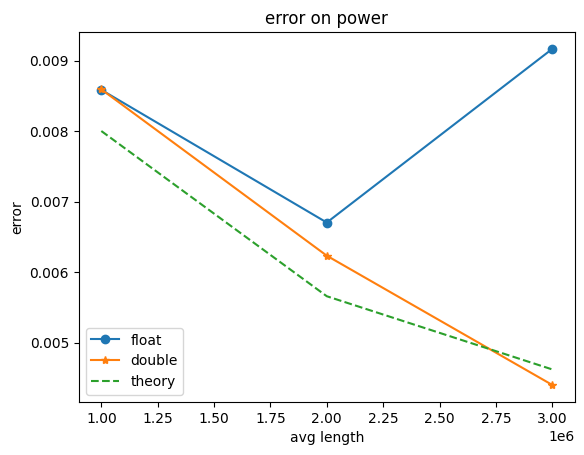

In [127]:
plt.plot(nspecs,err, marker='o',label="float")
plt.plot(nspecs,errd,marker='*',label="double")
plt.plot(nspecs,amp**2*2/np.sqrt(nspecs), ls='--', label="theory")
plt.legend()
plt.title("error on power")
plt.xlabel("avg length")
plt.ylabel("error")

In [105]:
err

array([0.71793598, 0.26587044, 0.08012143, 0.02526471, 0.00908981,
       0.09093955])

In [106]:
errd

array([0.71793581, 0.26587033, 0.08012239, 0.02526295, 0.00893388,
       0.00249924])

In [104]:
amp**2*2/np.sqrt(nspecs) #expected error on x^2 + y^2

array([0.8       , 0.25298221, 0.08      , 0.02529822, 0.008     ,
       0.00252982])

In [50]:
E1.shape

(5000000, 2)

In [38]:
xcorr=E1*np.conj(E2)

In [39]:
avgxcorr=np.sum(xcorr,axis=0)

In [40]:
E1d=E1.astype("complex128")
E2d=E2.astype("complex128")

In [41]:
xcorrd=E1d*np.conj(E2d)

In [42]:
avgxcorrd=np.sum(xcorrd,axis=0)

In [43]:
np.angle(avgxcorr)

array([8.442033e-12, 4.582072e-12], dtype=float32)

In [44]:
np.angle(avgxcorrd)

array([0., 0.])

In [45]:
avgxcorrd

array([9997048.74071026+0.j, 9993153.01551229+0.j])

In [46]:
avgxcorr

array([9967638.+8.4147126e-05j, 9964505.+4.5658082e-05j], dtype=complex64)

In [49]:
*1e-6

25000000.0